In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# reading a csv file as dataframe

col_names = ['Township','Collision Date','Collision Time','Vehicles Involved','Number Injured','Number Dead','Light Condition','Weather Conditions','Surface Condition','Roadway Junction Type','Road Character','Roadway Surface','Primary Factor','Manner of Collision','Traffic Control']
df = pd.read_csv("crash-data-monroe-county-2019-3.csv", usecols=col_names)

display(df.head())
print(df.info())

,Township,Collision Date,Collision Time,Vehicles Involved,Number Injured,Number Dead,Light Condition,Weather Conditions,Surface Condition,Roadway Junction Type,Road Character,Roadway Surface,Primary Factor,Manner of Collision,Traffic Control
0,BLOOMINGTON,1/1/2019,1:50 AM,2,0.0,0.0,DARK (LIGHTED),CLEAR,DRY,NO JUNCTION INVOLVED,STRAIGHT/LEVEL,ASPHALT,WRONG WAY ON ONE WAY,OPPOSITE DIRECTION SIDESWIPE,NONE
1,BLOOMINGTON,1/1/2019,6:39 PM,2,1.0,0.0,DARK (NOT LIGHTED),CLEAR,DRY,FOUR-WAY INTERSECTION,STRAIGHT/LEVEL,ASPHALT,FOLLOWING TOO CLOSELY,REAR END,TRAFFIC CONTROL SIGNAL
2,BLOOMINGTON,1/1/2019,12:47 PM,1,1.0,0.0,DAYLIGHT,CLOUDY,WET,FOUR-WAY INTERSECTION,STRAIGHT/GRADE,ASPHALT,DISREGARD SIGNAL/REG SIGN,OTHER - EXPLAIN IN NARRATIVE,STOP SIGN
3,BLOOMINGTON,1/1/2019,8:00 AM,1,0.0,0.0,DARK (NOT LIGHTED),RAIN,WET,T-INTERSECTION,CURVE/LEVEL,ASPHALT,RAN OFF ROAD RIGHT,RAN OFF ROAD,NONE
4,BLOOMINGTON,1/1/2019,4:55 AM,1,1.0,0.0,DARK (LIGHTED),CLOUDY,WET,NO JUNCTION INVOLVED,CURVE/GRADE,ASPHALT,ANIMAL/OBJECT IN ROADWAY,RAN OFF ROAD,LANE CONTROL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3848 entries, 0 to 3847
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Township               3848 non-null   object 
 1   Collision Date         3848 non-null   object 
 2   Collision Time         3848 non-null   object 
 3   Vehicles Involved      3848 non-null   int64  
 4   Number Injured         3837 non-null   float64
 5   Number Dead            3843 non-null   float64
 6   Light Condition        3836 non-null   object 
 7   Weather Conditions     3828 non-null   object 
 8   Surface Condition      3831 non-null   object 
 9   Roadway Junction Type  3848 non-null   object 
 10  Road Character         3753 non-null   object 
 11  Roadway Surface        3842 non-null   object 
 12  Primary Factor         3788 non-null   object 
 13  Manner of Collision    3804 non-null   object 
 14  Traffic Control        3750 non-null   object 
dtypes: f

In [5]:
#Removing missing values

df=df.dropna()
display(df.head())
print(df.info())

,Township,Collision Date,Collision Time,Vehicles Involved,Number Injured,Number Dead,Light Condition,Weather Conditions,Surface Condition,Roadway Junction Type,Road Character,Roadway Surface,Primary Factor,Manner of Collision,Traffic Control
0,BLOOMINGTON,1/1/2019,1:50 AM,2,0.0,0.0,DARK (LIGHTED),CLEAR,DRY,NO JUNCTION INVOLVED,STRAIGHT/LEVEL,ASPHALT,WRONG WAY ON ONE WAY,OPPOSITE DIRECTION SIDESWIPE,NONE
1,BLOOMINGTON,1/1/2019,6:39 PM,2,1.0,0.0,DARK (NOT LIGHTED),CLEAR,DRY,FOUR-WAY INTERSECTION,STRAIGHT/LEVEL,ASPHALT,FOLLOWING TOO CLOSELY,REAR END,TRAFFIC CONTROL SIGNAL
2,BLOOMINGTON,1/1/2019,12:47 PM,1,1.0,0.0,DAYLIGHT,CLOUDY,WET,FOUR-WAY INTERSECTION,STRAIGHT/GRADE,ASPHALT,DISREGARD SIGNAL/REG SIGN,OTHER - EXPLAIN IN NARRATIVE,STOP SIGN
3,BLOOMINGTON,1/1/2019,8:00 AM,1,0.0,0.0,DARK (NOT LIGHTED),RAIN,WET,T-INTERSECTION,CURVE/LEVEL,ASPHALT,RAN OFF ROAD RIGHT,RAN OFF ROAD,NONE
4,BLOOMINGTON,1/1/2019,4:55 AM,1,1.0,0.0,DARK (LIGHTED),CLOUDY,WET,NO JUNCTION INVOLVED,CURVE/GRADE,ASPHALT,ANIMAL/OBJECT IN ROADWAY,RAN OFF ROAD,LANE CONTROL


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3673 entries, 0 to 3847
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Township               3673 non-null   object 
 1   Collision Date         3673 non-null   object 
 2   Collision Time         3673 non-null   object 
 3   Vehicles Involved      3673 non-null   int64  
 4   Number Injured         3673 non-null   float64
 5   Number Dead            3673 non-null   float64
 6   Light Condition        3673 non-null   object 
 7   Weather Conditions     3673 non-null   object 
 8   Surface Condition      3673 non-null   object 
 9   Roadway Junction Type  3673 non-null   object 
 10  Road Character         3673 non-null   object 
 11  Roadway Surface        3673 non-null   object 
 12  Primary Factor         3673 non-null   object 
 13  Manner of Collision    3673 non-null   object 
 14  Traffic Control        3673 non-null   object 
dtypes: f

In [33]:
# A function to find the number of observations for unique value in a column of a DataFrame

def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No of Accidents'})
    
    return df_count

In [38]:

Surface_Condition_count = unique_val_count(df, 'Surface Condition')
Roadway_Junction_Type_count = unique_val_count(df, 'Roadway Junction Type')
Road_Character_count = unique_val_count(df, 'Road Character')
Roadway_Surface_count = unique_val_count(df, 'Roadway Surface')

In [57]:
unique_val_count(df, 'Township')

,Township,No of Accidents
0,BLOOMINGTON,1884
1,PERRY,711
2,RICHLAND,391
3,VAN BUREN,312
4,CLEAR CREEK,95
5,WASHINGTON,72
6,SALT CREEK,51
7,BENTON,48
8,INDIAN CREEK,44
9,BEAN BLOSSOM,43


In [43]:
#Bar plot

# A function to show the number of observations for each unique value in a column using a barplot

def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='No of Accidents', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("No of Accidents depending on " + column_x)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("No of Accidents")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

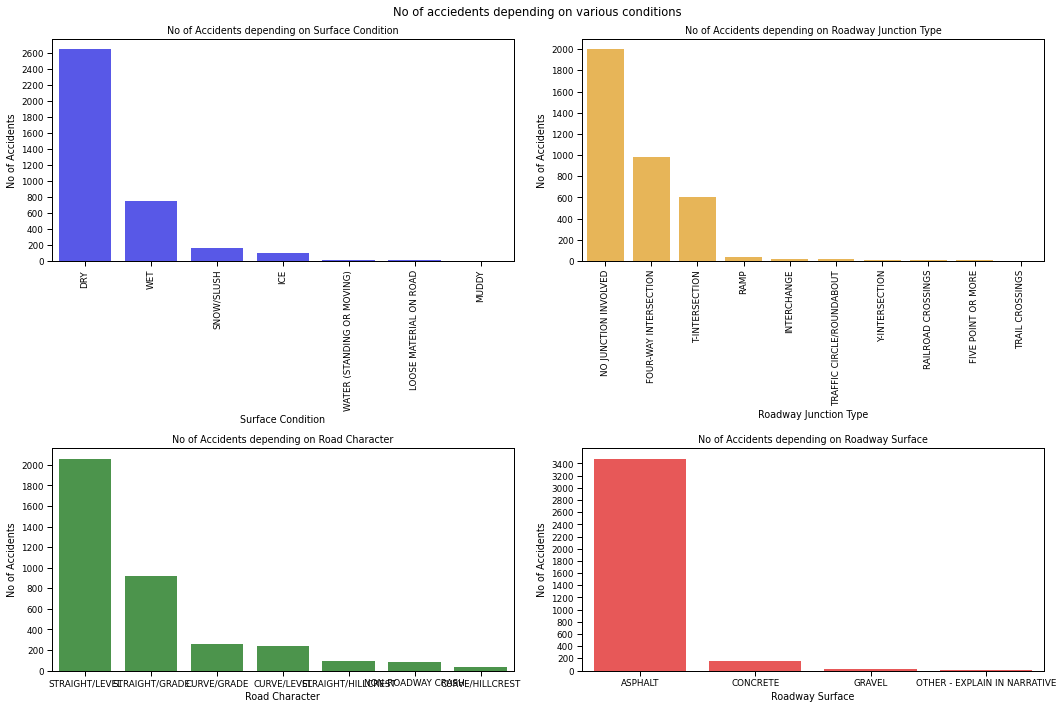

In [63]:
sns.set_context('paper')

plt.figure(figsize=(15,10))

# row 1, column 1
plt.subplot(2,2,1)
barplot(Surface_Condition_count, 'Surface Condition', 'blue', 90, np.arange(0,2800,200))

# row 1, column 2
plt.subplot(2,2,2)
barplot(Roadway_Junction_Type_count, 'Roadway Junction Type', 'orange', 90, np.arange(0,2200,200))

# row 2, column 1
plt.subplot(2,2,3)
barplot(Road_Character_count, 'Road Character', 'green', 0, np.arange(0,2200,200))

# row 2, column 2
plt.subplot(2,2,4)
barplot(Roadway_Surface_count, 'Roadway Surface', 'red', 0, np.arange(0,3500,200))

# write the title for all the plots
plt.suptitle("No of acciedents depending on various conditions")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

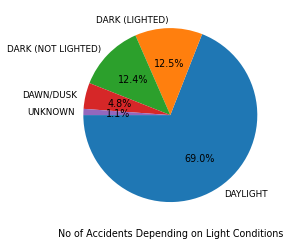

In [68]:
# Pie chart 
# A pie chart to show no of accidents depending on light conditions

df['Light Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=180)

plt.xlabel("No of Accidents Depending on Light Conditions")
plt.ylabel("")
plt.show()


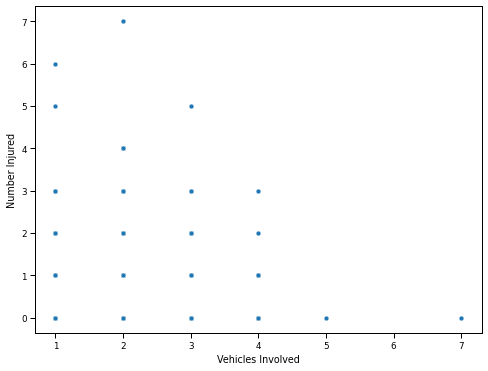

In [89]:
sns.set_context('paper')
plt.figure(figsize=(8,6))
sns.scatterplot(x='Vehicles Involved', y='Number Injured', data=df)

plt.show()

In [88]:
# number of unique values and their count in the 'Number Injured' column

df['Number Injured'].value_counts()

0.0    3020
1.0     508
2.0     114
3.0      20
4.0       7
5.0       2
6.0       1
7.0       1
Name: Number Injured, dtype: int64

In [70]:
# To determine whether there are injured or uninjured people in an accident

def check(x):
    if x>0:
        return 1
    else:
        return 0

In [72]:
df['Injured'] = df['Number Injured'].apply(check)
display(df.head(5))

,Township,Collision Date,Collision Time,Vehicles Involved,Number Injured,Number Dead,Light Condition,Weather Conditions,Surface Condition,Roadway Junction Type,Road Character,Roadway Surface,Primary Factor,Manner of Collision,Traffic Control,Injured
0,BLOOMINGTON,1/1/2019,1:50 AM,2,0.0,0.0,DARK (LIGHTED),CLEAR,DRY,NO JUNCTION INVOLVED,STRAIGHT/LEVEL,ASPHALT,WRONG WAY ON ONE WAY,OPPOSITE DIRECTION SIDESWIPE,NONE,0
1,BLOOMINGTON,1/1/2019,6:39 PM,2,1.0,0.0,DARK (NOT LIGHTED),CLEAR,DRY,FOUR-WAY INTERSECTION,STRAIGHT/LEVEL,ASPHALT,FOLLOWING TOO CLOSELY,REAR END,TRAFFIC CONTROL SIGNAL,1
2,BLOOMINGTON,1/1/2019,12:47 PM,1,1.0,0.0,DAYLIGHT,CLOUDY,WET,FOUR-WAY INTERSECTION,STRAIGHT/GRADE,ASPHALT,DISREGARD SIGNAL/REG SIGN,OTHER - EXPLAIN IN NARRATIVE,STOP SIGN,1
3,BLOOMINGTON,1/1/2019,8:00 AM,1,0.0,0.0,DARK (NOT LIGHTED),RAIN,WET,T-INTERSECTION,CURVE/LEVEL,ASPHALT,RAN OFF ROAD RIGHT,RAN OFF ROAD,NONE,0
4,BLOOMINGTON,1/1/2019,4:55 AM,1,1.0,0.0,DARK (LIGHTED),CLOUDY,WET,NO JUNCTION INVOLVED,CURVE/GRADE,ASPHALT,ANIMAL/OBJECT IN ROADWAY,RAN OFF ROAD,LANE CONTROL,1


In [73]:
# To identify if anyone died in an accident
def check(x):
    if x>0:
        return 1
    else:
        return 0
df['Dead'] = df['Number Dead'].apply(check)
display(df.head(5))

,Township,Collision Date,Collision Time,Vehicles Involved,Number Injured,Number Dead,Light Condition,Weather Conditions,Surface Condition,Roadway Junction Type,Road Character,Roadway Surface,Primary Factor,Manner of Collision,Traffic Control,Injured,Dead
0,BLOOMINGTON,1/1/2019,1:50 AM,2,0.0,0.0,DARK (LIGHTED),CLEAR,DRY,NO JUNCTION INVOLVED,STRAIGHT/LEVEL,ASPHALT,WRONG WAY ON ONE WAY,OPPOSITE DIRECTION SIDESWIPE,NONE,0,0
1,BLOOMINGTON,1/1/2019,6:39 PM,2,1.0,0.0,DARK (NOT LIGHTED),CLEAR,DRY,FOUR-WAY INTERSECTION,STRAIGHT/LEVEL,ASPHALT,FOLLOWING TOO CLOSELY,REAR END,TRAFFIC CONTROL SIGNAL,1,0
2,BLOOMINGTON,1/1/2019,12:47 PM,1,1.0,0.0,DAYLIGHT,CLOUDY,WET,FOUR-WAY INTERSECTION,STRAIGHT/GRADE,ASPHALT,DISREGARD SIGNAL/REG SIGN,OTHER - EXPLAIN IN NARRATIVE,STOP SIGN,1,0
3,BLOOMINGTON,1/1/2019,8:00 AM,1,0.0,0.0,DARK (NOT LIGHTED),RAIN,WET,T-INTERSECTION,CURVE/LEVEL,ASPHALT,RAN OFF ROAD RIGHT,RAN OFF ROAD,NONE,0,0
4,BLOOMINGTON,1/1/2019,4:55 AM,1,1.0,0.0,DARK (LIGHTED),CLOUDY,WET,NO JUNCTION INVOLVED,CURVE/GRADE,ASPHALT,ANIMAL/OBJECT IN ROADWAY,RAN OFF ROAD,LANE CONTROL,1,0


In [74]:
# Classifying according to the severity of the accident
def check(df):
    if df['Injured']==0:
        if df['Dead']==0:
            return 0
        else:
            return 0.5
    else:
        if df['Dead']==0:
            return 0.5
        else:
            return 1
df['Severity']=df.apply(check, axis=1)
   
display(df.head(10))

,Township,Collision Date,Collision Time,Vehicles Involved,Number Injured,Number Dead,Light Condition,Weather Conditions,Surface Condition,Roadway Junction Type,Road Character,Roadway Surface,Primary Factor,Manner of Collision,Traffic Control,Injured,Dead,Severity
0,BLOOMINGTON,1/1/2019,1:50 AM,2,0.0,0.0,DARK (LIGHTED),CLEAR,DRY,NO JUNCTION INVOLVED,STRAIGHT/LEVEL,ASPHALT,WRONG WAY ON ONE WAY,OPPOSITE DIRECTION SIDESWIPE,NONE,0,0,0.0
1,BLOOMINGTON,1/1/2019,6:39 PM,2,1.0,0.0,DARK (NOT LIGHTED),CLEAR,DRY,FOUR-WAY INTERSECTION,STRAIGHT/LEVEL,ASPHALT,FOLLOWING TOO CLOSELY,REAR END,TRAFFIC CONTROL SIGNAL,1,0,0.5
2,BLOOMINGTON,1/1/2019,12:47 PM,1,1.0,0.0,DAYLIGHT,CLOUDY,WET,FOUR-WAY INTERSECTION,STRAIGHT/GRADE,ASPHALT,DISREGARD SIGNAL/REG SIGN,OTHER - EXPLAIN IN NARRATIVE,STOP SIGN,1,0,0.5
3,BLOOMINGTON,1/1/2019,8:00 AM,1,0.0,0.0,DARK (NOT LIGHTED),RAIN,WET,T-INTERSECTION,CURVE/LEVEL,ASPHALT,RAN OFF ROAD RIGHT,RAN OFF ROAD,NONE,0,0,0.0
4,BLOOMINGTON,1/1/2019,4:55 AM,1,1.0,0.0,DARK (LIGHTED),CLOUDY,WET,NO JUNCTION INVOLVED,CURVE/GRADE,ASPHALT,ANIMAL/OBJECT IN ROADWAY,RAN OFF ROAD,LANE CONTROL,1,0,0.5
5,BLOOMINGTON,1/1/2019,3:28 AM,2,0.0,0.0,DARK (LIGHTED),CLEAR,DRY,FOUR-WAY INTERSECTION,STRAIGHT/LEVEL,ASPHALT,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,OTHER - EXPLAIN IN NARRATIVE,NONE,0,0,0.0
6,VAN BUREN,1/2/2019,1:27 PM,2,0.0,0.0,DAYLIGHT,CLOUDY,DRY,RAMP,CURVE/LEVEL,ASPHALT,FOLLOWING TOO CLOSELY,REAR END,YIELD SIGN,0,0,0.0
7,RICHLAND,1/2/2019,7:15 PM,2,0.0,0.0,DARK (LIGHTED),CLEAR,DRY,NO JUNCTION INVOLVED,STRAIGHT/LEVEL,ASPHALT,UNSAFE LANE MOVEMENT,SAME DIRECTION SIDESWIPE,LANE CONTROL,0,0,0.0
8,BLOOMINGTON,1/2/2019,10:27 AM,1,0.0,0.0,DAYLIGHT,CLOUDY,MUDDY,NO JUNCTION INVOLVED,STRAIGHT/LEVEL,GRAVEL,IMPROPER TURNING,OTHER - EXPLAIN IN NARRATIVE,NONE,0,0,0.0
9,VAN BUREN,1/2/2019,1:30 PM,2,2.0,0.0,DAYLIGHT,CLOUDY,DRY,NO JUNCTION INVOLVED,CURVE/GRADE,ASPHALT,LEFT OF CENTER,HEAD ON BETWEEN TWO MOTOR VEHICLES,NONE,1,0,0.5
